In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import matplotlib

# 读取数据并可视化

In [2]:
"""load data and visualiztion"""
data = loadmat('ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
data['X'].shape,data['y'].shape

((5000, 400), (5000, 1))

In [4]:
def polt_one_image(image):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.matshow(image.reshape((20, 20)), cmap=matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))

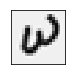

the number is actually: [3]


In [5]:
polt_one_image(data['X'][1998,:])
plt.show()
print('the number is actually:',data['y'][1998])

In [6]:
def plot_100_image(X):
    """ sample 100 image and show them
    assume the image is square

    X : (5000, 400)
    """
    size = int(np.sqrt(X.shape[1]))

    # sample 100 image, reshape, reorg it
    sample_idx = np.random.choice(np.arange(X.shape[0]), 100)  # 100*400
    sample_images = X[sample_idx, :]

    fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(8, 8))

    for r in range(10):
        for c in range(10):
            ax_array[r, c].matshow(sample_images[10 * r + c].reshape((size, size)),
                                   cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([])) 

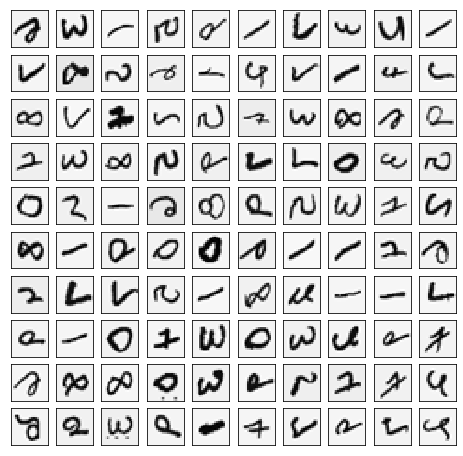

In [7]:
plot_100_image(data['X'])
plt.show()

# 代价和梯度

In [8]:
"""cost function"""
"""sigmoid函数"""
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g
def costfunction(X,y,theta):
    cost_pos = -y * np.log(sigmoid(X @ theta))
    cost_neg = -(1-y) * np.log(1 - sigmoid(X @ theta))
    cost = 1/len(X)*(cost_pos + cost_neg)
    return np.sum(cost)
def costfunctionreg(X,y,theta,c=1):
    reg = c/len(X)*np.sum(theta[1:]**2)
    return costfunction(X,y,theta)+reg

"""gradient"""
"""一个梯度步长"""
def gradient(X,y,theta):
    h = X @ theta
    erro = sigmoid(h) - y
    grad = (erro.T @ X)/len(X)
    return grad.T
"""正则化梯度步长"""
def gradientreg(X,y,theta,c=1):
    reg = c/len(X)*theta[1:] 
    reg = np.vstack([0,reg])
    return gradient(X,y,theta) + reg

# 数据初始化

In [9]:
raw_X = np.array(data['X'])
X = np.insert(raw_X, 0, values=np.ones(raw_X.shape[0]), axis=1)
raw_y = np.array(data['y'])
theta = np.zeros((X.shape[1],1))
X.shape,raw_y.shape,theta.shape

((5000, 401), (5000, 1), (401, 1))

In [10]:
"""need how many classfication?"""
k = np.unique(raw_y)
K = k.shape[0]
k,K

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8), 10)

In [11]:
"""vector label y"""
y_vector = []
for i in range(1,11):
    y_vector.append((raw_y == i).astype(int))
y_vector = np.array(y_vector)   
y_vector

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]]])

In [12]:
y = y_vector.reshape(10,5000)
new_y = y[9,np.newaxis].T
for i in range(9):
    temp = y[i,np.newaxis].T
    new_y = np.hstack([new_y,temp])
new_y.shape,new_y

((5000, 10),
 array([[1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]]))

# one vs all

In [13]:
"""use y_0 Training one model"""
y_0 = new_y[:,0,np.newaxis]
y_0

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

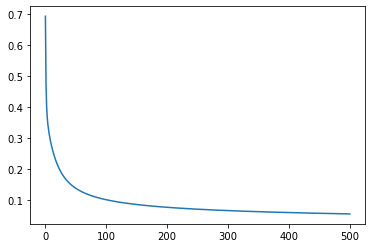

In [14]:
costs = [costfunctionreg(X,y_0,theta,c=1)]
for i in range(500):
    theta = theta - 0.1*gradientreg(X,y_0,theta,c=1)
    costs.append(costfunctionreg(X,y_0,theta,c=1))
plt.figure()
plt.plot(costs)
plt.show()
#看出来学习率为0.1时，500次的迭代差不多可以收敛。那就决定用这些参数训练剩下的分类器了

In [15]:
"""Training ten models"""
final_theta = theta

In [16]:
for i in range(1,10):
    y = new_y[:,i,np.newaxis]
    theta = np.zeros(((X.shape[1]),1))
    for i in range(500):
        theta = theta - 0.1*gradientreg(X,y,theta,c=1)
    final_theta = np.concatenate([final_theta,theta],axis = 1)
final_theta     

array([[-6.59322326e-01, -2.06927100e-01, -8.09205260e-01, ...,
        -4.63090503e-01, -1.30068056e+00, -8.06447204e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-6.16952857e-05,  6.51153013e-06,  9.62949457e-05, ...,
        -2.38007930e-05, -8.72896131e-06, -9.80230959e-06],
       [ 1.09491648e-06,  6.32989534e-08, -1.04303524e-05, ...,
         2.67404354e-06,  7.11685623e-07,  6.94721153e-07],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [17]:
final_theta.shape,final_theta[:,0,np.newaxis]

((401, 10),
 array([[-6.59322326e-01],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [-1.43355469e-07],
        [ 7.11472828e-07],
        [ 1.18966820e-05],
        [ 3.39081279e-05],
        [-1.02489449e-04],
        [-3.91603277e-04],
        [-2.99517298e-04],
        [-2.09446602e-04],
        [-2.51344115e-05],
        [ 4.92171736e-05],
        [ 9.83204335e-05],
        [ 2.36202411e-04],
        [ 2.85542819e-04],
        [ 5.57553095e-05],
        [ 1.42158944e-05],
        [ 5.82415167e-08],
        [-1.60316816e-07],
        [ 0.00000000e+00],
        [-9.43151450e-08],
        [ 1.45729725e-07],
        [ 5.18041532e-06],
        [ 6.83028277e-05],
        [ 4.17664331e-05],
        [-1.31721860e-03],
        [-1.80629578e-03],
        [-3.31024326e-03],
        [-3.16416884e-03],
        [-2.45374760e-04],
        [ 2.89414710e-04],
        [-3.72060339e-04],
        [-1.10449833e-03],
        [-2.36720254e-03],
        [-2.67244600e-03],
        [-3.8932

In [18]:
h = np.zeros((X.shape[0],10))
for i in range(10):
     h[:,i,np.newaxis] = sigmoid(X @ final_theta[:,i,np.newaxis])
h    

array([[9.84233745e-01, 2.18846931e-03, 1.09401266e-02, ...,
        1.50660997e-02, 1.20566691e-02, 1.56430803e-02],
       [9.64989698e-01, 3.51374434e-03, 4.71029764e-03, ...,
        1.62517931e-02, 4.04553621e-03, 5.00754353e-03],
       [2.14363994e-01, 7.37387884e-04, 7.57416862e-03, ...,
        5.08401391e-03, 1.11209689e-01, 8.82943404e-03],
       ...,
       [2.38001692e-03, 6.33468903e-02, 3.61638855e-02, ...,
        2.42464337e-02, 8.49589116e-02, 3.41463390e-01],
       [1.23214738e-03, 2.35294094e-03, 5.86178724e-04, ...,
        7.45446302e-02, 2.82390632e-02, 3.39784023e-01],
       [1.02838391e-01, 1.44091830e-03, 4.28711807e-02, ...,
        1.32580132e-01, 5.58358388e-02, 3.86949124e-02]])

In [19]:
h[1998,:],h[1998,3]
##确实第1998个样本预测是3！！！！

(array([0.00382627, 0.00145948, 0.02726366, 0.41169881, 0.00443538,
        0.03714062, 0.00093375, 0.02213688, 0.23031542, 0.06144087]),
 0.4116988140761464)

In [20]:
np.set_printoptions(suppress=True)
h

array([[0.98423374, 0.00218847, 0.01094013, ..., 0.0150661 , 0.01205667,
        0.01564308],
       [0.9649897 , 0.00351374, 0.0047103 , ..., 0.01625179, 0.00404554,
        0.00500754],
       [0.21436399, 0.00073739, 0.00757417, ..., 0.00508401, 0.11120969,
        0.00882943],
       ...,
       [0.00238002, 0.06334689, 0.03616389, ..., 0.02424643, 0.08495891,
        0.34146339],
       [0.00123215, 0.00235294, 0.00058618, ..., 0.07454463, 0.02823906,
        0.33978402],
       [0.10283839, 0.00144092, 0.04287118, ..., 0.13258013, 0.05583584,
        0.03869491]])

In [21]:
y_pred = np.argmax(h, axis=1)
y_pred

array([0, 0, 0, ..., 9, 9, 7])

In [22]:
from sklearn.metrics import classification_report#这个包是评价报告
y_answer = raw_y.copy()
y_answer[y_answer==10] = 0
print(classification_report(y_answer, y_pred))
#看来使用500次梯度下降训练的模型有近9成的正确率

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       500
           1       0.86      0.97      0.91       500
           2       0.90      0.82      0.86       500
           3       0.84      0.84      0.84       500
           4       0.88      0.90      0.89       500
           5       0.89      0.74      0.81       500
           6       0.89      0.95      0.92       500
           7       0.91      0.90      0.91       500
           8       0.85      0.86      0.85       500
           9       0.86      0.85      0.85       500

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



# 用神经网络预测（已知权重的情况下）

In [23]:
"""这个神经网络的结构"""
w = loadmat('ex3weights.mat')
w

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 18 14:57:02 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Theta1': array([[-0.02256239, -0.00000001,  0.        , ..., -0.00001305,
         -0.00000504,  0.        ],
        [-0.09838113,  0.00000001, -0.00000001, ..., -0.00005601,
          0.0000002 ,  0.        ],
        [ 0.11615605, -0.00000001,  0.00000001, ..., -0.00012095,
         -0.00000234, -0.00000001],
        ...,
        [-0.18322064, -0.00000001, -0.00000001, ...,  0.00002353,
         -0.00000325,  0.00000001],
        [-0.70209633,  0.        ,  0.        , ..., -0.00086176,
          0.00009434,  0.        ],
        [-0.35093323,  0.00000001, -0.        , ..., -0.0000018 ,
         -0.00000814,  0.00000001]]),
 'Theta2': array([[-0.76100352, -1.21244498, -0.10187131, -2.36850085, -1.05778129,
         -2.20823629,  0.56383834,  1.21105294,  2.21030997,  0.44456156,
         -1.18244872,  1.04289112, -1.60558756,  1.30419943,  1.37

In [24]:
theta1 = w['Theta1']
theta2 = w['Theta2']
theta1.shape,theta2.shape
#此神经网络有三层，一输入层，一隐含层，一输出层
#输出层有400+1个神经元，隐含层有25+1个，输出层有10个

((25, 401), (10, 26))

In [25]:
data2 = loadmat('ex3data1.mat')
X = data2['X']
y = data2['y']
X = np.insert(X, 0, np.ones(X.shape[0]), axis = 1)
X.shape,y.shape

((5000, 401), (5000, 1))

# 前向传播

In [26]:
"""先试试一个样本（1998，3）"""
a_1 = sigmoid(theta1 @ X[1998,:,np.newaxis])
a_1 = np.insert(a_1,0,1,axis = 0)
a_2 = sigmoid(theta2 @ a_1)
a_2, np.argmax(a_2)+1

(array([[0.00010878],
        [0.00118244],
        [0.9595334 ],
        [0.00023994],
        [0.01165754],
        [0.00000563],
        [0.00128467],
        [0.02332552],
        [0.00877801],
        [0.00090128]]),
 3)

In [27]:
"""全部样本"""
a_1 = X
z_2 = theta1 @ a_1.T
z_2

array([[ -2.93684669,  -4.81302157,  -4.24056958, ...,  -0.86267303,
          1.74408423,   3.55683614],
       [ -2.45058587,  -2.92257775,  -3.68698052, ...,   1.00939507,
         -0.58216518, -12.11330792],
       [  4.95510333,   2.6445065 ,   5.99656398, ...,  -1.67526051,
         -1.49164167,   5.01096205],
       ...,
       [  3.56635593,   2.10497303,   1.54599347, ...,   1.8185898 ,
          4.17481481,   7.17585008],
       [  2.81388641,   4.69948787,   3.08971226, ...,  -3.18203449,
         -0.96739536,   2.15484114],
       [ -2.1195223 ,  -2.76096862,  -2.32990819, ...,  -1.72539781,
         -3.08906563,  -2.9424052 ]])

In [28]:
a_2 = sigmoid(z_2)
a_2 = np.insert(a_2, 0, np.ones(X.shape[0]), axis =0)
a_2.shape

(26, 5000)

In [29]:
z_3 = theta2 @ a_2
z_3

array([[ -9.09100987,  -7.64327488,  -9.33162618, ...,  -2.90790484,
         -7.09249356,  -9.94121247],
       [ -6.35139284,  -6.02365485,  -5.72811111, ...,  -5.5644267 ,
         -7.3819422 ,  -7.68638967],
       [ -5.97820432,  -5.66663594,  -3.64155808, ...,  -3.48889874,
         -8.06415305, -10.74675633],
       ...,
       [ -7.81998092,  -6.03362019,  -2.71165297, ...,  -6.13702924,
         -4.41613593,  -5.15553077],
       [ -5.03242138,  -6.22762221,  -5.19785122, ...,   0.61827864,
          3.52570957,   0.82968816],
       [  5.45280636,   5.44411453,   2.55649129, ..., -10.62754533,
         -8.4865856 ,  -2.41737004]])

In [30]:
a_3 = sigmoid(z_3)
a_3 = a_3.T
a_3.shape

(5000, 10)

In [31]:
y_pred = np.argmax(a_3, axis = 1) + 1
y_pred

array([10, 10, 10, ...,  9,  9,  9])

In [32]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       500
           2       0.98      0.97      0.98       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.97      0.98      0.98       500
           6       0.98      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



In [33]:
#确实训练好的神经网络多元分类器比我自己编写的梯度下降多元分类器准确率高很多。那么如何训练神经网络，确定权重，将在ex4进行。